# Hackathon Challenge 1

In [1]:
import pandas as pd
import numpy as np

TRAIN_FILE = '/w/halld-scifs17exp/halld2/home/davidl/2020.03.04.hackathon/Set1/TRAIN/TRAIN.csv'
LABELS_FILE = '/w/halld-scifs17exp/halld2/home/davidl/2020.03.04.hackathon/Set1/TRAIN/TRAIN_labels.csv'

df       = pd.read_csv(TRAIN_FILE)
labelsdf = pd.read_csv(LABELS_FILE)

df.head()

,(0|0),(0|1),(0|2),(0|3),(0|4),(0|5),(0|6),(0|7),(0|8),(0|9),...,(35|90),(35|91),(35|92),(35|93),(35|94),(35|95),(35|96),(35|97),(35|98),(35|99)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Print shape of dataframes read from files

In [2]:
print( ' train shape: ' + str(df.shape) )
print( 'labels shape: ' + str(labelsdf.shape) )

 train shape: (100000, 3600)
labels shape: (100000, 3)


## Reshape and condense
The data is in a format where each event is a 100x36 element table. Each column has only 1 of the 100 wires hit so we want to convert the location of that into a y-value. The x-values will just be 1-36

In [3]:
tmp1 = df.values
tmp2 = tmp1.reshape((100000, 100,36))
yvals = np.argmax(tmp2, axis=1)

# Problem description does not actually say wire spacing or gaps
# between wires. Thomas said something about it, but I can't
# recall if that was while introducing the challenge before the
# hackathon, or at the AI workshop later.
#
# I cheat a little here and assume I know the layers are spaced
# 1 unit apart within a package and 50 units between packages
xvals = np.zeros(shape=(36,))
for ipackage in range(0,6):
    for ilayer in range(1,7):
        idx = ilayer-1 + 6*ipackage
        x = ipackage*50 + ilayer
        xvals[idx] = x

print( ' xvals shape: ' + str(xvals.shape) )
print( ' yvals shape: ' + str(yvals.shape) )
pd.DataFrame(yvals).head()

 xvals shape: (36,)
 yvals shape: (100000, 36)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,48,48,48,48,48,47,45,45,44,44,...,35,35,35,35,32,32,32,32,32,32
1,45,45,45,45,45,45,38,37,37,37,...,14,14,14,14,7,7,7,7,6,6
2,50,50,50,50,50,50,50,50,50,50,...,51,51,51,51,51,51,51,51,51,51
3,47,47,47,47,46,46,42,42,42,42,...,27,27,27,27,22,22,22,22,22,22
4,52,52,52,52,52,52,56,56,56,56,...,68,68,68,68,72,72,72,72,72,72


## Apply standard linear regression formulae 

In [4]:
SX = np.sum(xvals)
SY = np.sum(yvals, axis=1)
SXX = np.sum(xvals*xvals)
SXY = np.sum(xvals*yvals, axis=1)
SXSX = SX*SX


print('SX shape: ' + str(SX.shape))
print('SY shape: ' + str(SY.shape))
print('SXX shape: ' + str(SXX.shape))
print('SXY shape: ' + str(SXY.shape))
print('SXSX shape: ' + str(SXSX.shape))

N = 36
slope  = ((N*SXY) - SX*SY)/((N*SXX)-(SX*SX))
offset = (SY-slope*SX)/N

print('slope min: ' + str(np.min(slope)))
print('slope max: ' + str(np.max(slope)))
print('offset min: ' + str(np.min(offset)))
print('offset max: ' + str(np.max(offset)))

SX shape: ()
SY shape: (100000,)
SXX shape: ()
SXY shape: (100000,)
SXSX shape: ()
slope min: -0.1808362369337979
slope max: 0.17752518040402887
offset min: 43.5583119133299
offset max: 75.27429789988767


## Min and max of theta and z from labels
The following shows the limits of the theta and z values from the labels. The z values are all zero so just the angle is relevant.

In [5]:
print('LABELS -- theta1 min: %f  max: %f' %  (np.min(labelsdf.theta1), np.max(labelsdf.theta1)))
print('LABELS --     z1 min: %f  max: %f' %  (np.min(labelsdf.z1), np.max(labelsdf.z1)))

LABELS -- theta1 min: -9.999444  max: 9.999987
LABELS --     z1 min: 0.000000  max: 0.000000


## Convert to angle

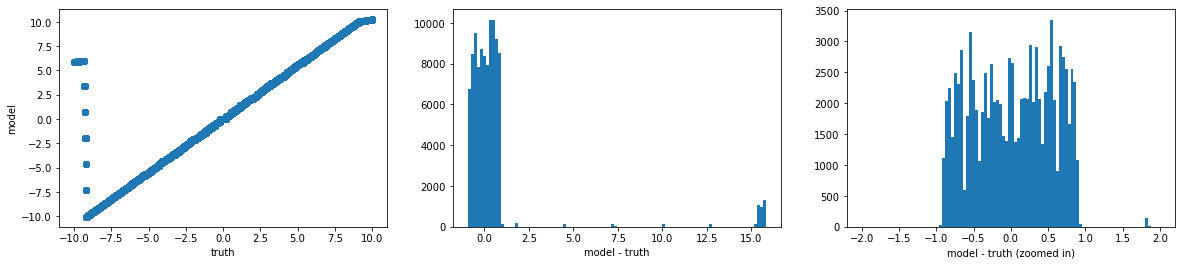

In [9]:
from math import *
import matplotlib.pyplot as plt

theta_regression = np.degrees(np.arctan(slope))

y = -theta_regression
x = labelsdf.theta1.values

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)
ax1.scatter(x, y)
ax1.set_ylabel('model')
ax1.set_xlabel('truth')
ax2.hist(y-x, bins=100)
ax2.set_xlabel('model - truth')
ax3.hist(y-x, bins=100, range=(-2.0,2.0))
ax3.set_xlabel('model - truth (zoomed in)')
plt.show()